In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [403]:
def basic_statistic(item_name='words', df=ner_label, color='blue'):
    num_items_doc = []

    for i in range(num_docs):
        num_items_doc.append(len(df[item_name][i]))

#     plt.title("Num of " + item_name + " for docs in test set")
    plt.bar(np.arange(num_docs), num_items_doc, color=color)
    plt.xlabel("Doc index")
    plt.ylabel("Number of " + item_name)

    print("Avg: %.3f" %np.mean(num_items_doc))
    print("Std: %.3f" %np.std(num_items_doc))

In [404]:
section

[[0, 241],
 [241, 1471],
 [1471, 2011],
 [2011, 2066],
 [2066, 2494],
 [2494, 2777],
 [2777, 3622],
 [3622, 4046],
 [4046, 4098],
 [4098, 5815],
 [5815, 7040],
 [7040, 8244],
 [8244, 8828],
 [8828, 9736],
 [9736, 9899],
 [9899, 10292]]

In [405]:
ner_label['sections'][i][-1]

[9899, 10292]

In [406]:
ner_label['words'][19]

['document',
 ':',
 'Massively',
 'Multilingual',
 'Sentence',
 'Embeddings',
 'for',
 'Zero',
 '-',
 'Shot',
 'Cross',
 '-',
 'Lingual',
 'Transfer',
 'and',
 'Beyond',
 'We',
 'introduce',
 'an',
 'architecture',
 'to',
 'learn',
 'joint',
 'multilingual',
 'sentence',
 'representations',
 'for',
 '93',
 'languages',
 ',',
 'belonging',
 'to',
 'more',
 'than',
 '30',
 'different',
 'language',
 'families',
 'and',
 'written',
 'in',
 '28',
 'different',
 'scripts',
 '.',
 'Our',
 'system',
 'uses',
 'a',
 'single',
 'BiLSTM',
 'encoder',
 'with',
 'a',
 'shared',
 'BPE',
 'vocabulary',
 'for',
 'all',
 'languages',
 ',',
 'which',
 'is',
 'coupled',
 'with',
 'an',
 'auxiliary',
 'decoder',
 'and',
 'trained',
 'on',
 'publicly',
 'available',
 'parallel',
 'corpora',
 '.',
 'This',
 'enables',
 'us',
 'to',
 'learn',
 'a',
 'classifier',
 'on',
 'top',
 'of',
 'the',
 'resulting',
 'sentence',
 'embeddings',
 'using',
 'English',
 'annotated',
 'data',
 'only',
 ',',
 'and',
 'tran

# Read test set

In [407]:
ner_label = pd.read_json("../scirex_dataset/release_data/test.jsonl", lines=True)
num_docs = ner_label.shape[0]
# print(ner_label.columns)
print("%d documnets are in the test set." %num_docs)

66 documnets are in the test set.


## words

In [408]:
len(ner_label['words'][19])

6200

In [409]:
plt.rcParams.update({'font.size': 18})

Avg: 6230.742
Std: 2065.682


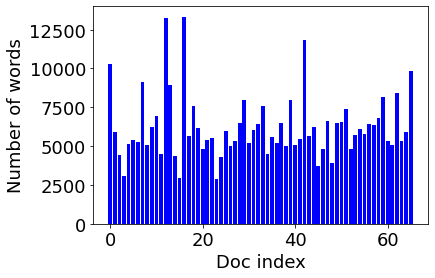

In [410]:
basic_statistic()

## sections
Looks like paragraph

Around 291 words / section

In [411]:
ner_label['sections'][:5]

0    [[0, 241], [241, 1471], [1471, 2011], [2011, 2...
1    [[0, 149], [149, 968], [968, 1000], [1000, 140...
2    [[0, 15], [15, 225], [225, 1396], [1396, 1965]...
3    [[0, 151], [151, 629], [629, 758], [758, 1168]...
4    [[0, 212], [212, 896], [896, 1384], [1384, 159...
Name: sections, dtype: object

Avg: 21.348
Std: 7.549


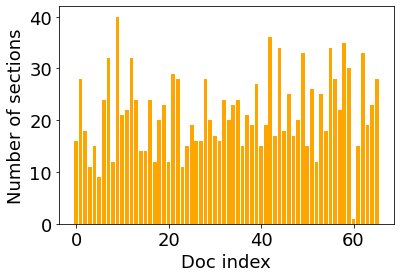

In [412]:
basic_statistic(item_name='sections', color='orange')

## sentences
Around 15 sentences / section

Around 21 words / sentence

In [413]:
ner_label['sentences'][:5]

0    [[0, 9], [9, 26], [26, 42], [42, 76], [76, 94]...
1    [[0, 24], [24, 53], [53, 80], [80, 131], [131,...
2    [[0, 15], [15, 18], [18, 34], [34, 67], [67, 1...
3    [[0, 11], [11, 50], [50, 97], [97, 117], [117,...
4    [[0, 9], [9, 34], [34, 52], [52, 106], [106, 1...
Name: sentences, dtype: object

Avg: 294.379
Std: 112.418


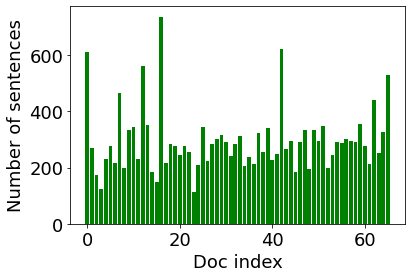

In [414]:
basic_statistic(item_name='sentences', color='green')

# Read NER prediction results

In [415]:
ner_pred = pd.read_json("ner_predictions.jsonl", lines=True)

In [416]:
# Merge pred results and ground truth for the coonvenience of analysis
ner_pred_label = pd.merge(ner_pred, ner_label, on='doc_id', how='left')

In [417]:
# blah_x : from ner_pred
ner_pred_label.columns

Index(['doc_id', 'ner_x', 'sections_x', 'sentences_x', 'words_x', 'coref',
       'coref_non_salient', 'method_subrelations', 'n_ary_relations', 'ner_y',
       'sections_y', 'sentences_y', 'words_y'],
      dtype='object')

# Ploting Figure 5, 6, 7 together

[Text(0.5, 43.00000000000006, '(d)\nDoc index')]

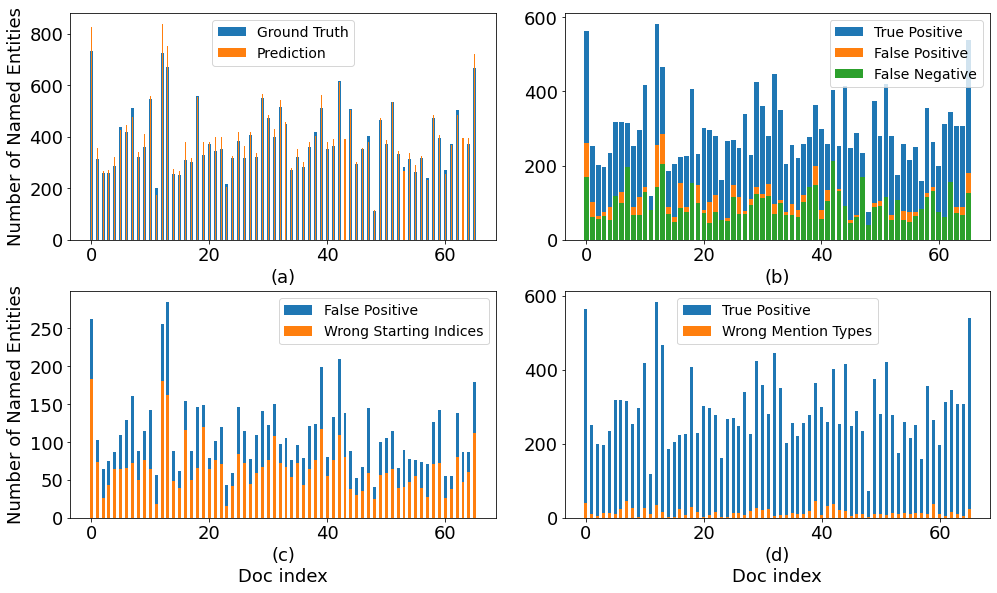

In [490]:
plt.rc('legend', fontsize=14,) 
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()
fig.tight_layout()
# plt.rcParams.update({‘font.size’: 15})
# fig.suptitle('Sharing both axes')
axs[0].bar(np.arange(num_docs), num_items_label, width=0.5, align='center')
axs[0].bar(np.arange(num_docs), num_items_pred, width=0.35/2, align='center')
axs[0].legend(['Ground Truth', 'Prediction',])
axs[0].set(ylabel = "Number of " + 'Named Entities')
axs[0].set(xlabel = "(a)")

axs[1].bar(np.arange(num_docs), tp_list, )
axs[1].bar(np.arange(num_docs), fp_list, )
axs[1].bar(np.arange(num_docs), fn_list, )
axs[1].legend(['True Positive', 'False Positive', 'False Negative', ])
axs[1].set(xlabel = "(b)")

axs[2].bar(np.arange(num_docs), fp_list, width=0.5, align='center')
axs[2].bar(np.arange(num_docs), start_wrong_list, width=0.5, align='center')
axs[2].legend(['False Positive', 'Wrong Starting Indices',])
axs[2].set(ylabel = "Number of " + 'Named Entities')
axs[2].set(xlabel = "(c)\nDoc index")
# axs[2].set(xlabel = '')

axs[3].bar(np.arange(num_docs), tp_list, width=0.5, align='center')
axs[3].bar(np.arange(num_docs), label_wrong_list, width=0.5, align='center')
# ax.bar(np.arange(num_docs), end_wrong_list, width=0.3/2, align='center')

axs[3].legend(['True Positive', 'Wrong Mention Types',])
axs[3].set(xlabel = "(d)\nDoc index")
# axs[3].set(xlabel = 'Doc index')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("#" + item_name + ": Prediction v.s. Ground Truth")

ax.bar(np.arange(num_docs), num_items_label, width=0.5, align='center')
ax.bar(np.arange(num_docs), num_items_pred, width=0.35/2, align='center')

plt.legend(['Ground Truth', 'Prediction',])

plt.xlabel("Doc idex")
plt.ylabel("# " + item_name)
plt.show()

print("Ground Truth Avg: %.3f" %np.mean(num_items_label))
print("Ground Truth Std: %.3f" %np.std(num_items_label))
print("Prediction Avg: %.3f" %np.mean(num_items_pred))
print("Prediction Std: %.3f" %np.std(num_items_pred))

## Figure 5 Avg num of Pred exceeds num of GT

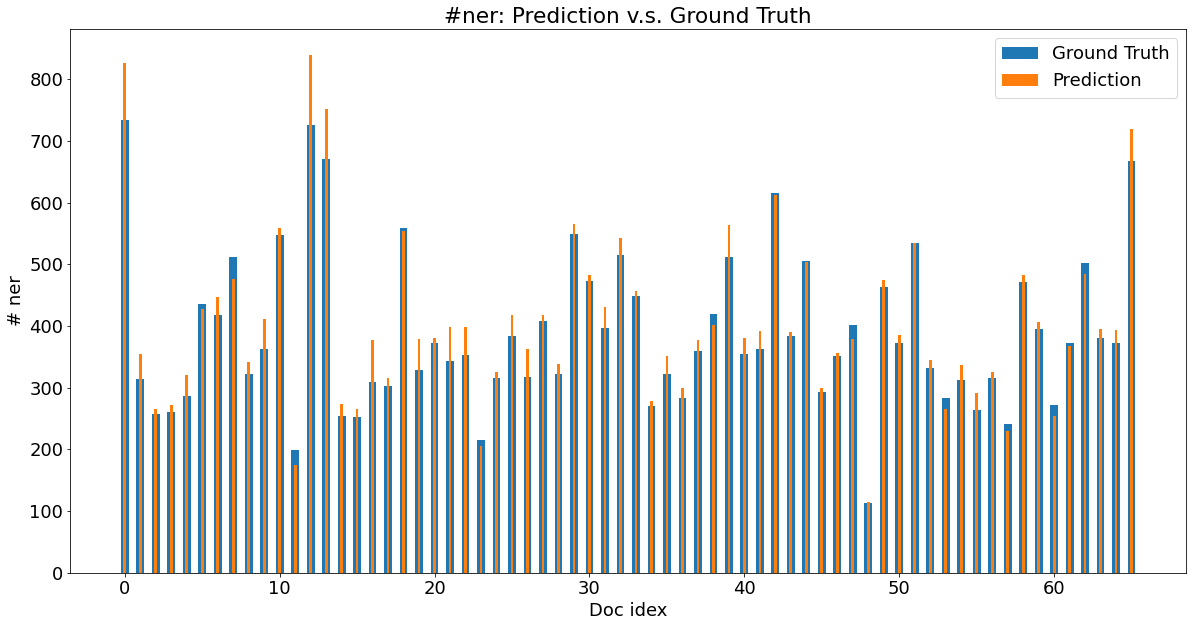

Ground Truth Avg: 387.409
Ground Truth Std: 124.979
Prediction Avg: 405.394
Prediction Std: 137.050


In [420]:
item_name = 'ner'
num_items_pred = []
num_items_label = []

for i in range(num_docs):
    num_items_pred.append(len(ner_pred_label['ner_x'][i]))
    num_items_label.append(len(ner_pred_label['ner_y'][i]))

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("#" + item_name + ": Prediction v.s. Ground Truth")

ax.bar(np.arange(num_docs), num_items_label, width=0.5, align='center')
ax.bar(np.arange(num_docs), num_items_pred, width=0.35/2, align='center')

plt.legend(['Ground Truth', 'Prediction',])

plt.xlabel("Doc idex")
plt.ylabel("# " + item_name)
plt.show()

print("Ground Truth Avg: %.3f" %np.mean(num_items_label))
print("Ground Truth Std: %.3f" %np.std(num_items_label))
print("Prediction Avg: %.3f" %np.mean(num_items_pred))
print("Prediction Std: %.3f" %np.std(num_items_pred))

# Confusion matrix calculation fun

In [421]:
def get_ner_fp_fn_tp(doci=0):
    
    fp = 0
    fn = 0
    tp = 0 # fn + tp = len(GT: Ground Truth)

    end_wrong = 0
    start_wrong = 0 # end_wrong + start_wrong = fp
    label_wrong = 0 # label_wrong <= tp
    
    numGT = len(ner_pred_label['ner_y'][doci]) # Num of GT spans

    ground_truth = defaultdict(dict) # 1st key: span_start, 2nd key: span_end, value: label
    pred_result = defaultdict(dict) 

    for entity_label in ner_pred_label['ner_y'][doci]: # Construct GT dict for doci
        span_start = entity_label[0]
        span_end = entity_label[1]
        span_label = entity_label[2]
        ground_truth[span_start][span_end] = span_label

    for entity_pred in ner_pred_label['ner_x'][doci]: # Check pred results
        pred_start = entity_pred[0]
        pred_end = entity_pred[1]
        pred_label = entity_pred[2]

        if pred_start in ground_truth.keys():
            if pred_end in ground_truth[pred_start].keys():
                tp += 1
                
                if pred_label != ground_truth[pred_start][pred_end]:
                    label_wrong += 1
                    
            else:
                end_wrong += 1
                fp += 1
                
        else:
            start_wrong += 1
            fp += 1

    fn = numGT - tp        
    return fp, fn, tp, end_wrong, start_wrong, label_wrong

In [422]:
def get_ner_fp_fn_tp(doci=0):
    
    fp = 0
    fn = 0
    tp = 0 # fn + tp = len(GT: Ground Truth)

    end_wrong = 0
    start_wrong = 0 # end_wrong + start_wrong = fp
    label_wrong = 0 # label_wrong <= tp
    
    numGT = len(ner_pred_label['ner_y'][doci]) # Num of GT spans

    ground_truth = defaultdict(dict) # 1st key: span_start, 2nd key: span_end, value: label
    pred_result = defaultdict(dict) 

    for entity_label in ner_pred_label['ner_y'][doci]: # Construct GT dict for doci
        span_start = entity_label[0]
        span_end = entity_label[1]
        span_label = entity_label[2]
        ground_truth[span_start][span_end] = span_label

    for entity_pred in ner_pred_label['ner_x'][doci]: # Check pred results
        pred_start = entity_pred[0]
        pred_end = entity_pred[1]
        pred_label = entity_pred[2]

        if pred_start in ground_truth.keys():
            if pred_end in ground_truth[pred_start].keys():
                
                
                if pred_label == ground_truth[pred_start][pred_end]:
                    tp += 1
                else:
                    fp += 1
                    label_wrong += 1
                    
            else:
                end_wrong += 1
                fp += 1
                
        else:
            start_wrong += 1
            fp += 1

    fn = numGT - tp        
    return fp, fn, tp, end_wrong, start_wrong, label_wrong

# Get result statistics for all the test docs

In [423]:
fp_list = []
fn_list = []
tp_list = []
end_wrong_list = []
start_wrong_list = []
label_wrong_list = []

for i in range(num_docs):
    fp, fn, tp, end_wrong, start_wrong, label_wrong = get_ner_fp_fn_tp(i)
    
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    end_wrong_list.append(end_wrong)
    start_wrong_list.append(start_wrong)
    label_wrong_list.append(label_wrong)

# Figure 5 FP > FN $\approx$ 1/3 TP

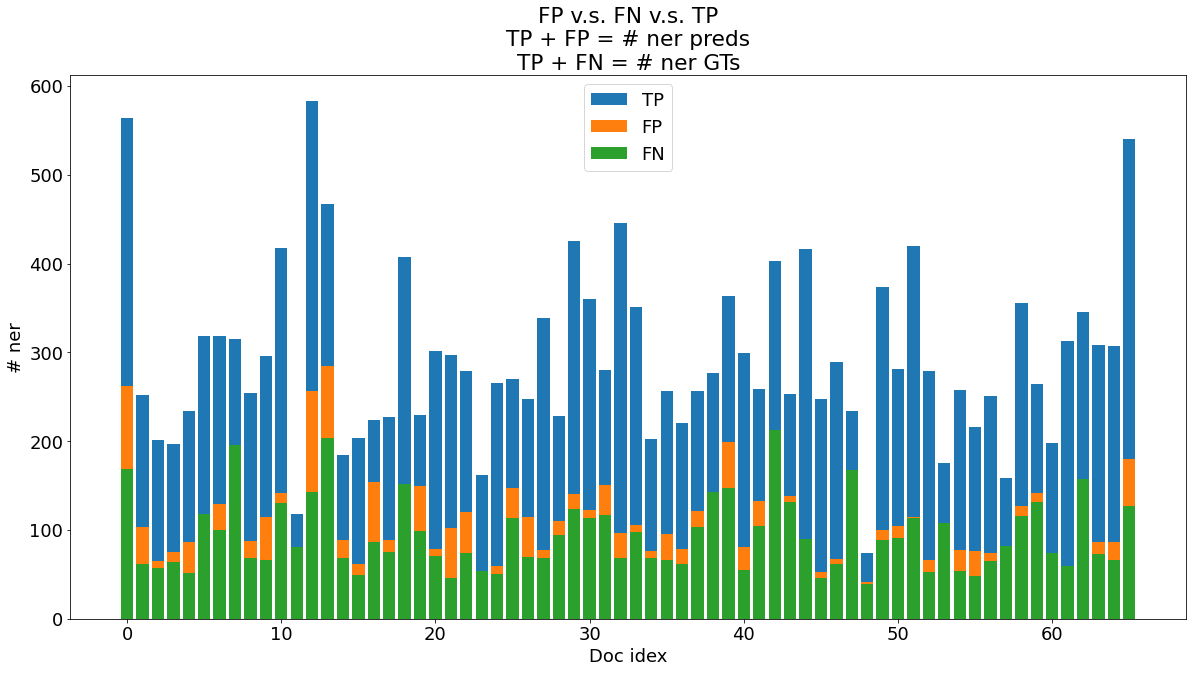

Avg FP: 112.045
Avg FN: 94.061
Avg TP: 293.348


In [424]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("FP v.s. FN v.s. TP\nTP + FP = # ner preds\nTP + FN = # ner GTs")

ax.bar(np.arange(num_docs), tp_list, )
ax.bar(np.arange(num_docs), fp_list, )
ax.bar(np.arange(num_docs), fn_list, )

# ax.bar(np.arange(num_docs), end_wrong_list, width=0.3/2, align='center')

plt.legend(['TP', 'FP', 'FN', ])

plt.xlabel("Doc idex")
plt.ylabel("# " + item_name)
plt.show()

print("Avg FP: %.3f" %np.mean(fp_list))
print("Avg FN: %.3f" %np.mean(fn_list))
print("Avg TP: %.3f" %np.mean(tp_list))

# Figure 6 start_wrong takes up 59% of FP
start_wrong > end_wrong

In [ ]:
1, 20

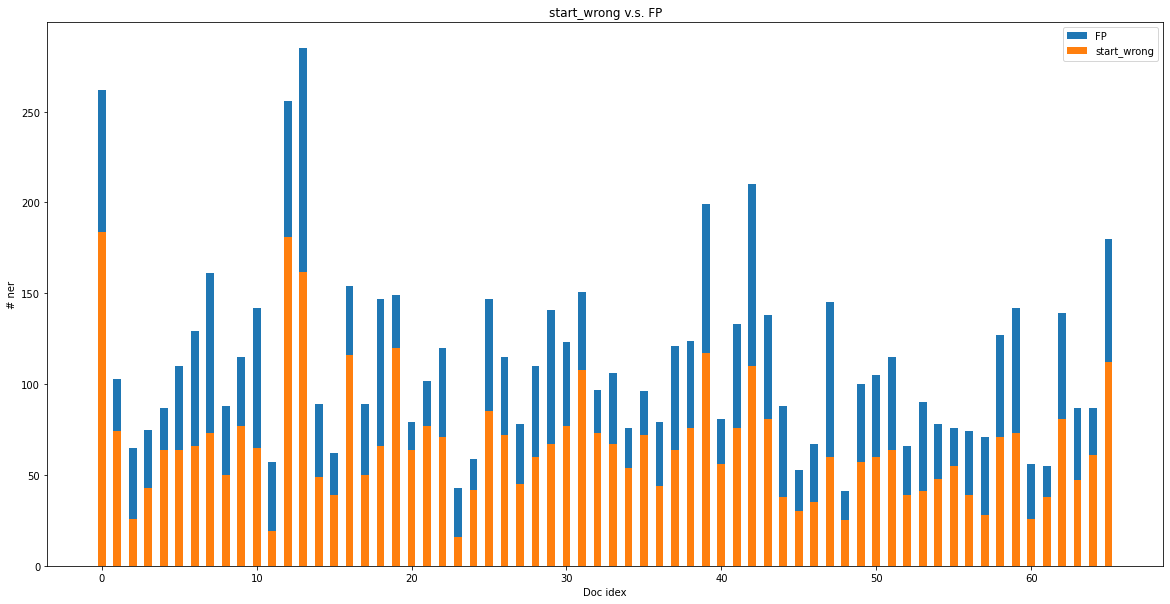

Start wrong among FP: 59.364%


In [299]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("start_wrong v.s. FP")

ax.bar(np.arange(num_docs), fp_list, width=0.5, align='center')
ax.bar(np.arange(num_docs), start_wrong_list, width=0.5, align='center')
# ax.bar(np.arange(num_docs), end_wrong_list, width=0.3/2, align='center')

plt.legend(['FP', 'start_wrong',])

plt.xlabel("Doc idex")
plt.ylabel("# " + item_name)
plt.show()

print("Start wrong among FP: %.3f%%" %(np.sum(start_wrong_list)/np.sum(fp_list)*100))

# Around 5% TP has wrong labels

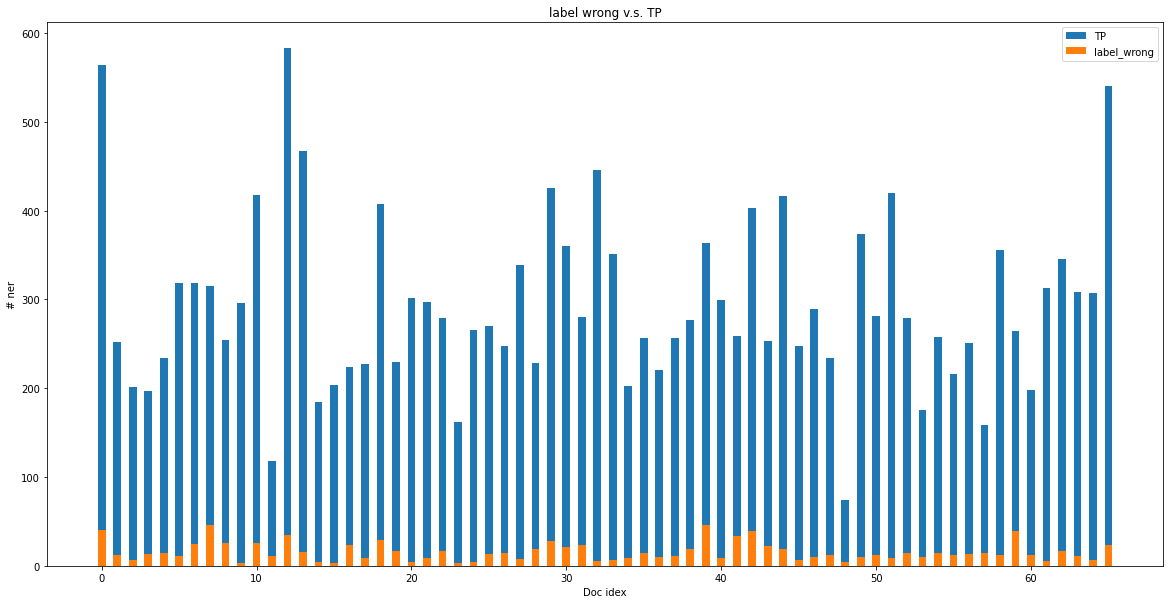

Label wrong among TP: 5.366%


In [300]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("label wrong v.s. TP")

ax.bar(np.arange(num_docs), tp_list, width=0.5, align='center')
ax.bar(np.arange(num_docs), label_wrong_list, width=0.5, align='center')
# ax.bar(np.arange(num_docs), end_wrong_list, width=0.3/2, align='center')

plt.legend(['TP', 'label_wrong',])

plt.xlabel("Doc idex")
plt.ylabel("# " + item_name)
plt.show()

print("Label wrong among TP: %.3f%%" %(np.sum(label_wrong_list)/np.sum(tp_list)*100))

In [369]:
1 - 0.005366

0.994634

In [301]:
precision = tp / (tp + fp)
print(precision)

0.75


In [302]:
recall = tp / (tp + fn)
print(recall)

0.8095952023988006


In [303]:
f1 = 2 * precision * recall / (precision + recall) # Macro

In [304]:
f1

0.7786589762076422

P : 0.707 R: 0.717 F1: 0.712